In [1]:
# -*- coding: utf-8 -*-

### 기본 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### [Step 1] 데이터 준비 
- read_csv() 함수로 자동차 연비 데이터셋 가져오기

In [11]:
df = pd.read_csv('autompg.csv', header = None)

In [12]:
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']

In [13]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,mpg,cyl,disp,hp,wt,accler,year,origin,carname
1,18,8,307,17,3504,12,70,1,chevrolet chevelle malibu
2,15,8,350,35,3693,11.5,70,1,buick skylark 320
3,18,8,318,29,3436,11,70,1,plymouth satellite
4,16,8,304,29,3433,12,70,1,amc rebel sst


In [14]:
print(df.head())

   mpg cylinders displacement horsepower weight acceleration model year  \
0  mpg       cyl         disp         hp     wt       accler       year   
1   18         8          307         17   3504           12         70   
2   15         8          350         35   3693         11.5         70   
3   18         8          318         29   3436           11         70   
4   16         8          304         29   3433           12         70   

   origin                       name  
0  origin                    carname  
1       1  chevrolet chevelle malibu  
2       1          buick skylark 320  
3       1         plymouth satellite  
4       1              amc rebel sst  


In [16]:
#  IPython 디스플레이 설정 - 출력할 열의 개수 한도 늘리기
pd.set_option('display.max_columns', 10)
print(df.head())

   mpg cylinders displacement horsepower weight acceleration model year  \
0  mpg       cyl         disp         hp     wt       accler       year   
1   18         8          307         17   3504           12         70   
2   15         8          350         35   3693         11.5         70   
3   18         8          318         29   3436           11         70   
4   16         8          304         29   3433           12         70   

   origin                       name  
0  origin                    carname  
1       1  chevrolet chevelle malibu  
2       1          buick skylark 320  
3       1         plymouth satellite  
4       1              amc rebel sst  


### [Step 2] 데이터 탐색

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   mpg           399 non-null    object
 1   cylinders     399 non-null    object
 2   displacement  399 non-null    object
 3   horsepower    399 non-null    object
 4   weight        399 non-null    object
 5   acceleration  399 non-null    object
 6   model year    399 non-null    object
 7   origin        399 non-null    object
 8   name          399 non-null    object
dtypes: object(9)
memory usage: 28.2+ KB


In [18]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
count,399,399,399,399,399,399,399,399,399
unique,130,6,83,95,352,96,14,4,306
top,13,4,97,29,2130,14.5,73,1,ford pinto
freq,20,204,21,22,4,23,40,249,6


In [19]:
df.horsepower.unique()
# unique() : 특정 열의 고유값 확인

array(['hp', '17', '35', '29', '24', '42', '47', '46', '48', '40', '37',
       '34', '91', '93', '81', '84', '50', '83', '86', '10', '43', '45',
       '41', '1', '2', '5', '38', '31', '39', '8', '69', '82', '67', '72',
       '62', '66', '57', '76', '55', '44', '32', '9', '88', '26', '21',
       '33', '36', '90', '6', '49', '52', '71', '87', '14', '64', '79',
       '74', '53', '58', '89', '27', '16', '92', '68', '94', '11', '54',
       '77', '75', '13', '30', '3', '7', '65', '56', '28', '85', '60',
       '51', '63', '23', '4', '15', '19', '22', '20', '25', '73', '59',
       '18', '80', '61', '70', '12', '78'], dtype=object)

In [20]:
# 문자열(object) -> 숫자 변경(replace)
df.horsepower.replace('hp', np.nan, inplace = True)

In [21]:
df = df.drop(0, axis = 0)
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
1,18,8,307,17,3504,12,70,1,chevrolet chevelle malibu
2,15,8,350,35,3693,11.5,70,1,buick skylark 320
3,18,8,318,29,3436,11,70,1,plymouth satellite
4,16,8,304,29,3433,12,70,1,amc rebel sst
5,17,8,302,24,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
394,27,4,140,82,2790,15.6,82,1,ford mustang gl
395,44,4,97,53,2130,24.6,82,2,vw pickup
396,32,4,135,80,2295,11.6,82,1,dodge rampage
397,28,4,120,75,2625,18.6,82,1,ford ranger


In [28]:
df.horsepower = df.horsepower.astype('float')  # 실수형으로 변경
df.mpg = df.mpg.astype('float')
df.cylinders = df.cylinders.astype('int')
df.displacement = df.displacement.astype('float')
df.weight = df.weight.astype('float')
df['model year'] = df['model year'].astype('float')
df.origin = df.origin.astype('int')

In [27]:
df.horsepower.dtype

dtype('float64')

In [30]:
df.describe()  # 요약통계량

,mpg,cylinders,displacement,horsepower,weight,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,51.389447,2970.424623,76.010050,1.572864
std,7.815984,1.701004,104.269838,29.932360,846.841774,3.697627,0.802055
min,9.000000,3.000000,68.000000,1.000000,1613.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,26.000000,2223.750000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,60.500000,2803.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,79.000000,3608.000000,79.000000,2.000000
max,46.600000,8.000000,455.000000,94.000000,5140.000000,82.000000,3.000000


### [Step 3] 속성(feature 또는 variable) 선택

In [33]:
ndf = df[['mpg','cylinders','horsepower','weight']]
ndf

,mpg,cylinders,horsepower,weight
1,18.0,8,17.0,3504.0
2,15.0,8,35.0,3693.0
3,18.0,8,29.0,3436.0
4,16.0,8,29.0,3433.0
5,17.0,8,24.0,3449.0
...,...,...,...,...
394,27.0,4,82.0,2790.0
395,44.0,4,53.0,2130.0
396,32.0,4,80.0,2295.0
397,28.0,4,75.0,2625.0


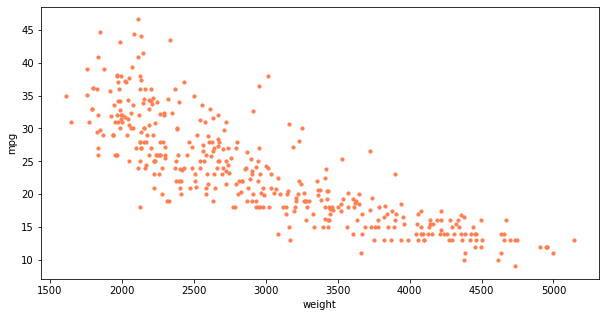

In [34]:
### 종속 변수 Y인 "연비(mpg)"와 다른 변수 간의 선형관계를 그래프(산점도)로 확인
# 산점도 그리기
ndf.plot(kind = 'scatter', x = 'weight', y = 'mpg', c = 'coral', s = 10, figsize = (10,5))
plt.show()

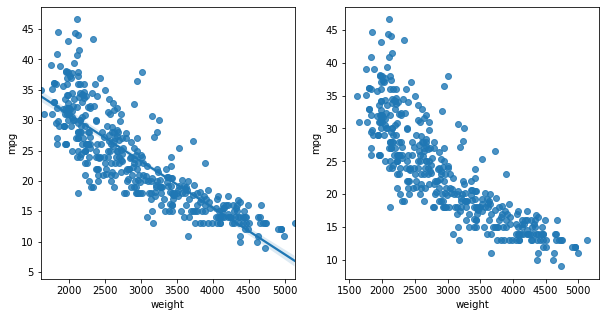

In [40]:
# seaborn
fig = plt.figure(figsize = (10, 5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
sns.regplot(x = 'weight', y = 'mpg', data = ndf, ax = ax1) # 회귀선 표시
sns.regplot(x = 'weight', y = 'mpg', data = ndf, ax = ax2, fit_reg = False) # 회귀선 미표시
plt.show()

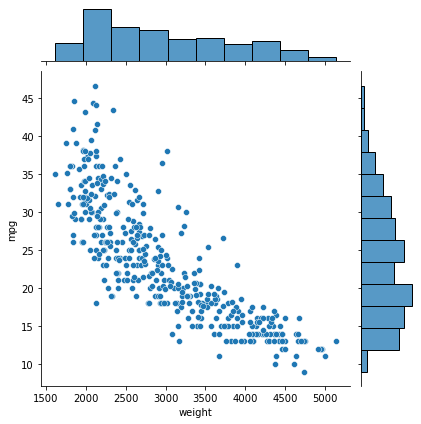

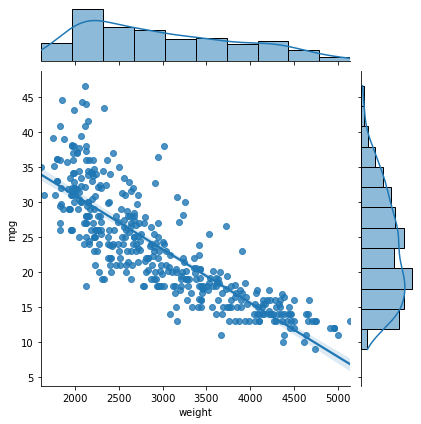

In [44]:
# seaborn 조인트 그래프 - 산점도, 히스토그램
sns.jointplot(x = 'weight', y = 'mpg', data = ndf)
sns.jointplot(x = 'weight', y = 'mpg', kind = 'reg', data = ndf)
plt.show()

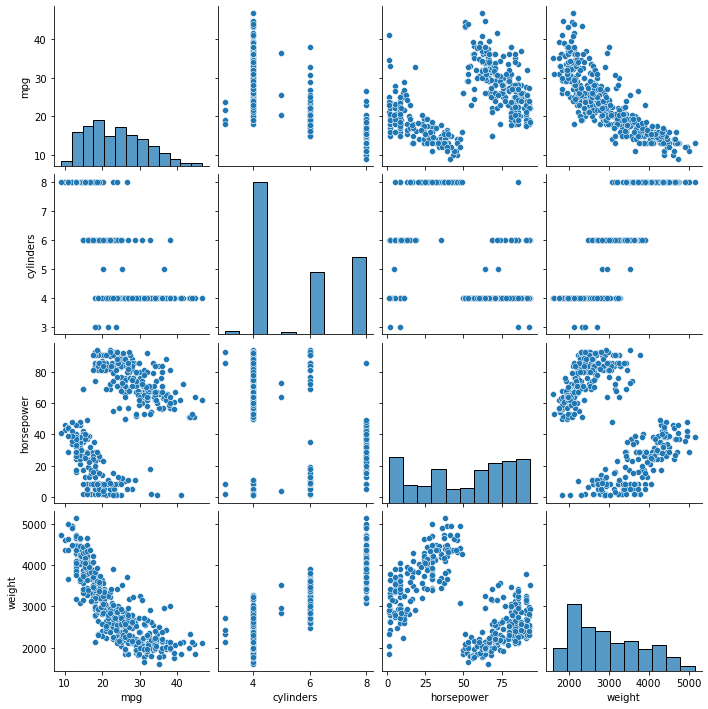

In [45]:
# seaborn pairplot으로 두 변수 간의 모든 경우의 수 그리기
sns.pairplot(ndf)

### Step 4: 데이터셋 구분 - 훈련용(train data)/ 검증용(test data)

In [51]:
# 속성(변수) 선택

X = ndf[['weight']]  # df,  ndf['weight'] : series
y = ndf['mpg']
X

,weight
1,3504.0
2,3693.0
3,3436.0
4,3433.0
5,3449.0
...,...
394,2790.0
395,2130.0
396,2295.0
397,2625.0


In [48]:
type(X)

pandas.core.frame.DataFrame

In [50]:
X.shape

(398, 1)

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(len(X_train), len(X_test))

278 120


### Step 5: 단순회귀분석 모형 - sklearn 사용

In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
lr = LinearRegression()
lr.fit(X_train, y_train) # fit : 학습, train data로

LinearRegression()

In [55]:
# 성능평가(score) -> 결정계수(R2 : 설명력) 계산
r_2 = lr.score(X_test, y_test)
r_2
# 결과해석 : 72% 설명력 가짐

0.7243152426344307

In [56]:
lr.coef_   # 회귀식의 기울기

array([-0.00784408])

In [57]:
lr.intercept_  # 회귀식의 y절편

46.93728507432636

In [58]:
# 모형 전체 X 데이터 입력, y(실제값)과 y_hat(예측값) 비교
y_hat = lr.predict(X)
y_hat

array([19.45164525, 17.96911502, 19.98504237, 20.0085746 , 19.88306939,
       12.88615423, 12.78418125, 13.11363241, 12.22725191, 16.7375952 ,
       18.98884481, 18.62801734, 17.4357179 , 22.73046872, 28.33113848,
       24.71501977, 25.17782021, 26.64466229, 30.2294047 , 32.54340691,
       25.97791589, 27.87618211, 28.30760625, 29.41362087, 26.1661737 ,
       10.7368776 , 12.61161159, 12.56454714,  9.81912079, 30.2294047 ,
       29.17829861, 29.46068532, 30.88830703, 26.27599075, 19.96151014,
       20.82435843, 21.03614846, 21.14596551, 13.92157217, 11.92133297,
       14.35299631, 14.80795268,  8.069892  ,  9.70930374,  6.61873807,
       23.70313406, 28.04875177, 21.19302996, 22.31473273, 29.52343792,
       30.28431323, 30.66867292, 30.7392696 , 33.02973958, 34.28479163,
       32.55125099, 31.60211788, 29.06848156, 30.260781  , 29.25673937,
       28.04875177, 29.47637347, 13.41170727, 12.54101492, 14.50203374,
       14.54909819, 18.1338406 , 10.59568424, 11.62325811, 11.98

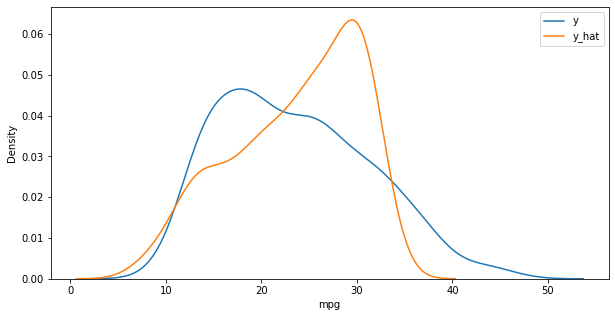

In [61]:
plt.figure(figsize=(10,5))
ax1 = sns.kdeplot(y, label = 'y')
ax2 = sns.kdeplot(y_hat, label = 'y_hat', ax = ax1)
plt.legend()
plt.show()

In [74]:
#df.to_csv('autompg.csv')